In [13]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# initializing the CNN
classifier = Sequential()

# each convolution layer has 32 filters of size 3x3, so dot product of input image and filter
classifier.add(Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))
#Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Addition of Second CL and pooling to get more accuracy
classifier.add(Convolution2D(32,3,3,activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Flattening the output into a 1D thus it can be passed into fcl
classifier.add(Flatten())

# FCL
classifier.add(Dense(units=128, activation='relu'))
# binary classication
classifier.add(Dense(units=1, activation='sigmoid'))

# Compiling the CNN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
# Image preprocessing-fitting the CNN to image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# datagen doesnt regenerate images from the original data
training_set = train_datagen.flow_from_directory(r'C:\Users\probi\Downloads\Naani\Dataset\Train',
                                                 target_size=(64, 64),
                                                 batch_size=9,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory(r'C:\Users\probi\Downloads\Naani\Dataset\Test',
                                             target_size=(64, 64),
                                             batch_size=9,
                                             class_mode='binary')

history = classifier.fit(training_set,
                          steps_per_epoch=575,
                          epochs=5,
                          validation_data=test_set,
                          validation_steps=119)

# history = classifier.fit(training_set,
#                        steps_per_epoch=len(training_set),
#                        epochs=10,  
#                        validation_data=test_set,
#                        validation_steps=len(test_set),
#                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

model_save_path = r'C:\Users\probi\Downloads\Naani\model.h5'
classifier.save(model_save_path)

print("Model saved successfully at:", model_save_path)

Found 8068 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Epoch 1/5
  1/575 ━━━━━━━━━━━━━━━━━━━━ 16:01 2s/step - accuracy: 0.4444 - loss: 0.6958

c:\Users\probi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


575/575 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.5387 - loss: 0.6873 - val_accuracy: 0.5836 - val_loss: 0.6542
Epoch 2/5
321/575 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6861 - loss: 0.5992

c:\Users\probi\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


575/575 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6906 - loss: 0.5931 - val_accuracy: 0.7448 - val_loss: 0.5296
Epoch 3/5
575/575 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.7238 - loss: 0.5449 - val_accuracy: 0.7535 - val_loss: 0.5123
Epoch 4/5
575/575 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7668 - loss: 0.4640 - val_accuracy: 0.7713 - val_loss: 0.4795
Epoch 5/5
575/575 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7946 - loss: 0.4346 - val_accuracy: 0.7899 - val_loss: 0.4416


Model saved successfully at: C:\Users\probi\Downloads\Naani\model.h5


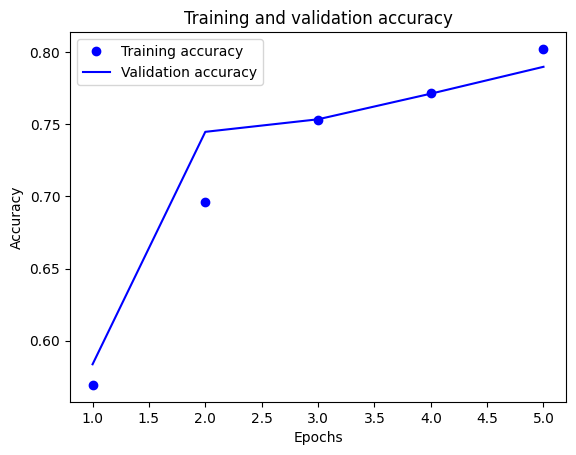

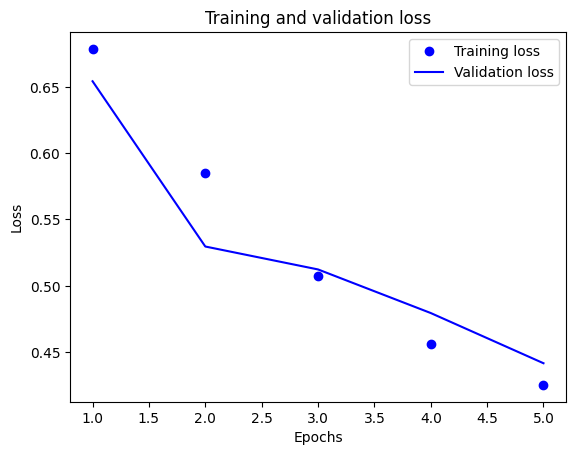

In [11]:
import matplotlib.pyplot as plt

# accuracy graprh
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# loss graphh
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
from keras.models import load_model
import numpy as np
from keras.preprocessing import image

model_path = r'C:\Users\probi\Downloads\Naani\model.h5'
model = load_model(model_path)
#TODO: preprocess the image.

test_image_path = r'C:\Users\probi\Downloads\Naani\test.png'  
test_image = image.load_img(test_image_path, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image /= 255. 

prediction = model.predict(test_image)

if prediction[0][0] > 0.5:
    result = 'normal'
else:
    result = 'cataract'

print("Prediction:", result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Prediction: normal
